## Data Science and Business Analytics Internship
## Task 1: Prediction Using Supervised Machine Learning
## Author: Ahmed Mohammed 



### Importing Nessecary libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sna
from sklearn import metrics
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading data from link

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Explaratry Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Correlation between hours and scores

In [8]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


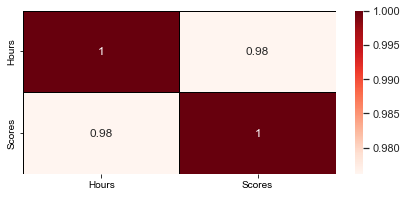

In [9]:
fig, ax = plt.subplots(figsize=(7,3))
sna.set(font_scale=1)
ax = sna.heatmap(corr, cmap = 'Reds',annot = True, linewidths=0.5, linecolor='black')
plt.show()

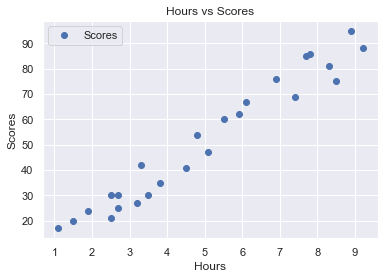

In [10]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing the data for the model

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Training complete.")

Training complete.


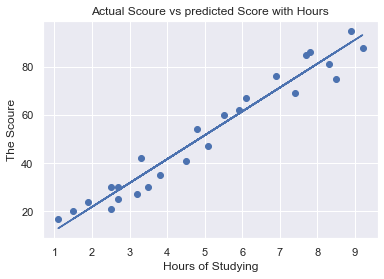

In [14]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours of Studying")
plt.ylabel("The Scoure")
plt.title("Actual Scoure vs predicted Score with Hours")
plt.show()

### Making Predictions

In [15]:
print('Model Train Score is : ' , regressor.score(X_train, y_train))
print('Model Test Score is : ' , regressor.score(X_test, y_test))

Model Train Score is :  0.9515510725211552
Model Test Score is :  0.9454906892105356


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
accuracy=metrics.r2_score(y_test,y_pred)
print('Accuracy: ',accuracy*100)
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred)) 

Accuracy:  94.54906892105356
Mean Absolute Error:  4.183859899002975


### What will be predicted score if a student studies for 9.25 hrs/ day

In [18]:
predection = regressor.predict([[9.25]])
print(predection[0])

93.69173248737538
